# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make a GET request to the OpenWeatherMap API
        response = requests.get(city_url)
        
        # If the response is successful (status code 200), proceed
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")
        
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred: {e}. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | nogliki
Processing Record 4 of Set 1 | makubetsu
Processing Record 5 of Set 1 | okhotsk
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | rongelap
Processing Record 9 of Set 1 | tougan
Processing Record 10 of Set 1 | pangoa
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | ghanzi
Processing Record 13 of Set 1 | vernon
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | port douglas
Processing Record 22 of Set 1 | nikolayevsk-on-amu

Processing Record 191 of Set 1 | muynoq
Processing Record 192 of Set 1 | kataragama
City not found. Skipping...
Processing Record 193 of Set 1 | prado
Processing Record 194 of Set 1 | kingston
Processing Record 195 of Set 1 | wanning
Processing Record 196 of Set 1 | richmond
Processing Record 197 of Set 1 | lawas
Processing Record 198 of Set 1 | naryn
Processing Record 199 of Set 1 | vilyuchinsk
Processing Record 200 of Set 1 | punta arenas
Processing Record 201 of Set 1 | vorgashor
Processing Record 202 of Set 1 | kibaya
Processing Record 203 of Set 1 | arauca
Processing Record 204 of Set 1 | hawaiian paradise park
Processing Record 205 of Set 1 | lihue
Processing Record 206 of Set 1 | lebu
Processing Record 207 of Set 1 | sosnovo-ozerskoye
Processing Record 208 of Set 1 | lagos
Processing Record 209 of Set 1 | pangody
Processing Record 210 of Set 1 | fort bragg
Processing Record 211 of Set 1 | am djarass
City not found. Skipping...
Processing Record 212 of Set 1 | la sarre
Processing

City not found. Skipping...
Processing Record 379 of Set 1 | preobrazheniye
Processing Record 380 of Set 1 | sinabang
Processing Record 381 of Set 1 | nuoro
Processing Record 382 of Set 1 | iskateley
Processing Record 383 of Set 1 | saint-joseph
Processing Record 384 of Set 1 | nykobing sjaelland
Processing Record 385 of Set 1 | wum
Processing Record 386 of Set 1 | wauchope
Processing Record 387 of Set 1 | chongwe
Processing Record 388 of Set 1 | camana
Processing Record 389 of Set 1 | lucea
Processing Record 390 of Set 1 | codrington
Processing Record 391 of Set 1 | bayji
Processing Record 392 of Set 1 | labrador city
Processing Record 393 of Set 1 | miles city
Processing Record 394 of Set 1 | pimenta bueno
Processing Record 395 of Set 1 | lomo de arico
Processing Record 396 of Set 1 | massawa
Processing Record 397 of Set 1 | novyy urengoy
Processing Record 398 of Set 1 | carnarvon
Processing Record 399 of Set 1 | kerouane
Processing Record 400 of Set 1 | al ghayzah
Processing Record 

Processing Record 566 of Set 1 | kuching
Processing Record 567 of Set 1 | weno
Processing Record 568 of Set 1 | kerrville
Processing Record 569 of Set 1 | gorontalo
Processing Record 570 of Set 1 | at taj
Processing Record 571 of Set 1 | el playon
Processing Record 572 of Set 1 | tchollire
Processing Record 573 of Set 1 | adler
Processing Record 574 of Set 1 | ust'-ordynskiy
Processing Record 575 of Set 1 | tarawa
Processing Record 576 of Set 1 | benghazi
Processing Record 577 of Set 1 | aktas
Processing Record 578 of Set 1 | lospalos
Processing Record 579 of Set 1 | dolores
Processing Record 580 of Set 1 | bodaybo
Processing Record 581 of Set 1 | numata
Processing Record 582 of Set 1 | tukrah
Processing Record 583 of Set 1 | patterson
Processing Record 584 of Set 1 | bol'shoye boldino
Processing Record 585 of Set 1 | yanykurgan
Processing Record 586 of Set 1 | lerwick
Processing Record 587 of Set 1 | juneau
Processing Record 588 of Set 1 | arteche
-----------------------------
Data Re

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,299.37,74,74,8.55,MU,1714446870
1,waitangi,-43.9535,-176.5597,286.94,88,100,3.58,NZ,1714446870
2,nogliki,51.8333,143.1667,278.34,55,64,1.79,RU,1714446870
3,makubetsu,45.3714,141.8211,280.35,75,100,4.03,JP,1714446870
4,okhotsk,59.3833,143.3000,273.75,97,100,3.95,RU,1714446870


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,299.37,74,74,8.55,MU,1714446870
1,waitangi,-43.9535,-176.5597,286.94,88,100,3.58,NZ,1714446870
2,nogliki,51.8333,143.1667,278.34,55,64,1.79,RU,1714446870
3,makubetsu,45.3714,141.8211,280.35,75,100,4.03,JP,1714446870
4,okhotsk,59.3833,143.3000,273.75,97,100,3.95,RU,1714446870


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

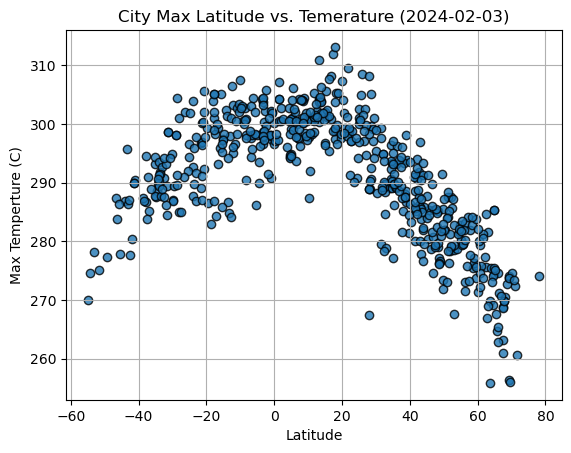

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temerature (2024-02-03)")
plt.ylabel("Max Temperture (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig2.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

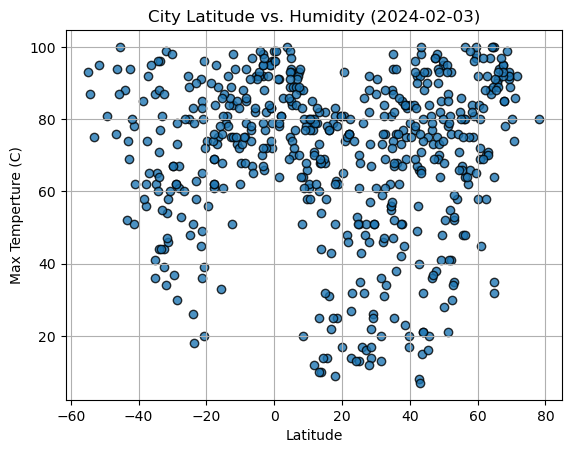

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-03)")
plt.ylabel("Max Temperture (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig3.png")


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

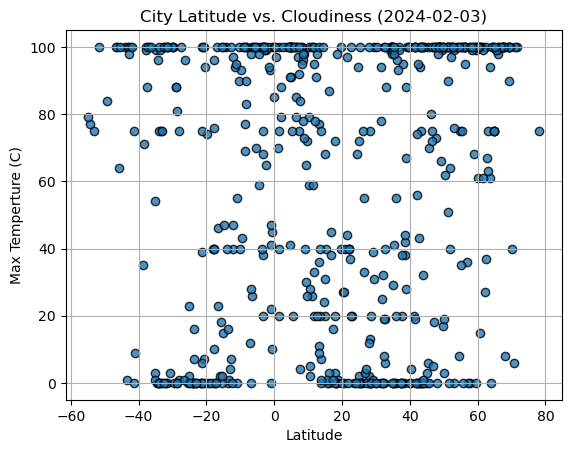

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-03)")
plt.ylabel("Max Temperture (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig4.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

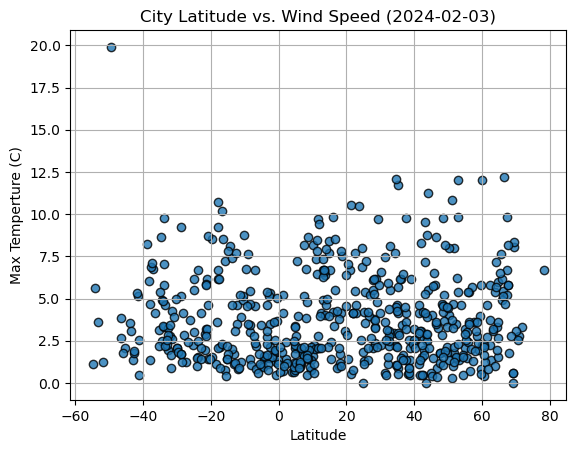

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-03)")
plt.ylabel("Max Temperture (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig5.png")


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots

# Extracting x and y values
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Creating line equation string
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
print(line_eq)

# Calculating regression values
regress_values = x_values * slope + intercept
print(regress_values)



y = -0.17x + 293.89
City_ID
0      297.270677
1      301.435887
2      284.997120
3      286.106100
4      283.701402
          ...    
563    284.452643
564    286.356045
565    283.569049
566    283.886990
567    291.787850
Name: Lat, Length: 568, dtype: float64


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nogliki,51.8333,143.1667,278.34,55,64,1.79,RU,1714446870
3,makubetsu,45.3714,141.8211,280.35,75,100,4.03,JP,1714446870
4,okhotsk,59.3833,143.3000,273.75,97,100,3.95,RU,1714446870
6,petropavlovsk-kamchatsky,53.0452,158.6483,278.48,52,0,12.00,RU,1714446870
7,rongelap,11.1635,166.8941,300.62,79,100,7.32,MH,1714446870


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,299.37,74,74,8.55,MU,1714446870
1,waitangi,-43.9535,-176.5597,286.94,88,100,3.58,NZ,1714446870
5,grytviken,-54.2811,-36.5092,274.55,87,77,5.60,GS,1714446870
9,pangoa,-12.1167,-73.0000,295.05,98,97,0.83,PE,1714446870
11,ghanzi,-21.5667,21.7833,289.16,45,0,2.89,BW,1714446871


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7584885609730411


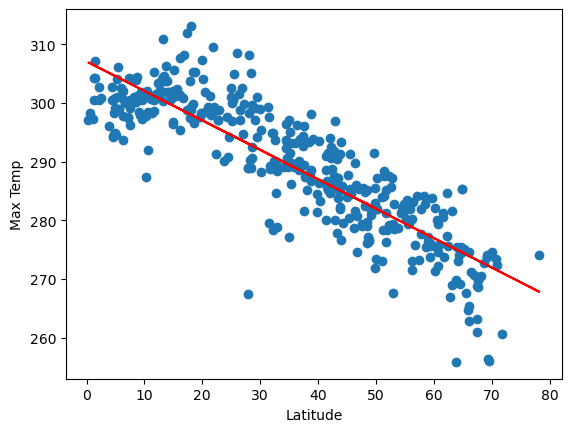

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Labeling plot and annotating the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (2, -55), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig6.png")

# Show plot
plt.show()


The r-value is: 0.45211469538642846


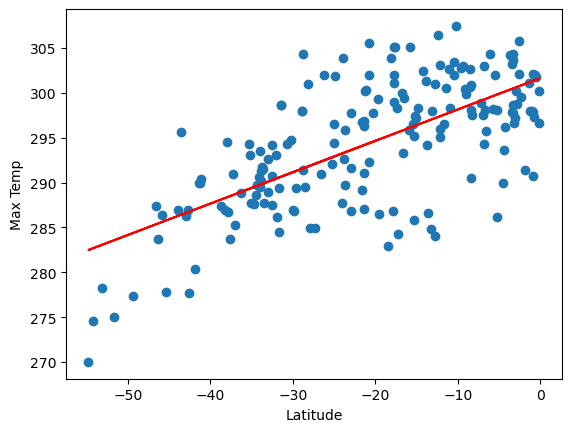

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Labeling plot and annotating the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (-45, 20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig7.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** The proximity to the 0 latitude is an indicator of whether temperatures tend to be higher.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01954947220961964


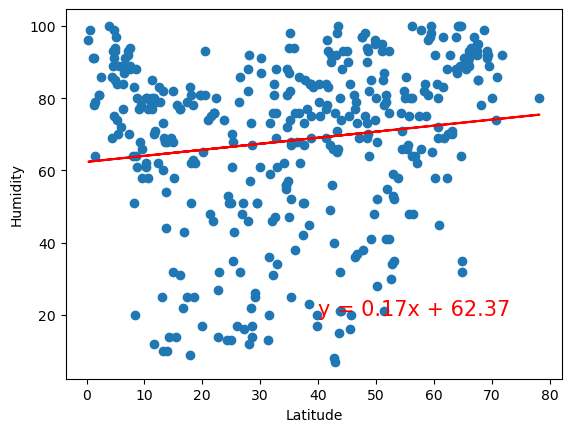

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Labeling plot and annotating the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (40, 20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig8.png")

# Show plot
plt.show()

The r-value is: 0.05871342355133001


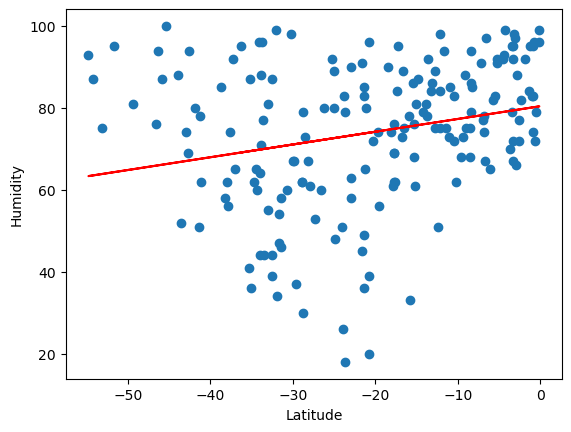

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Labeling plot and annotating the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (-66, 20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig9.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere there is a more pronounced linear correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.031428150879627505


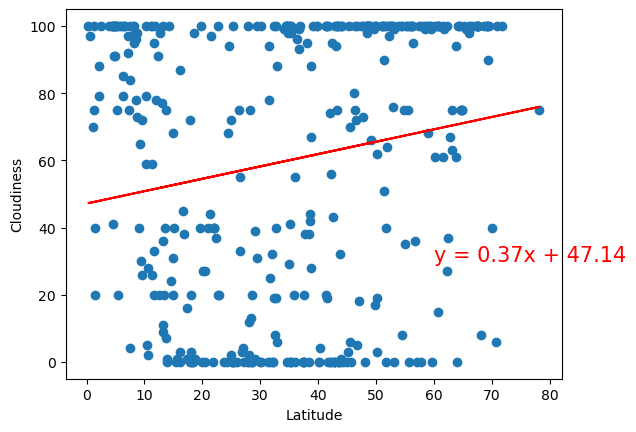

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Labeling plot and annotating the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (60, 30), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig10.png")

# Show plot
plt.show()

The r-value is: 0.0002857455331193984


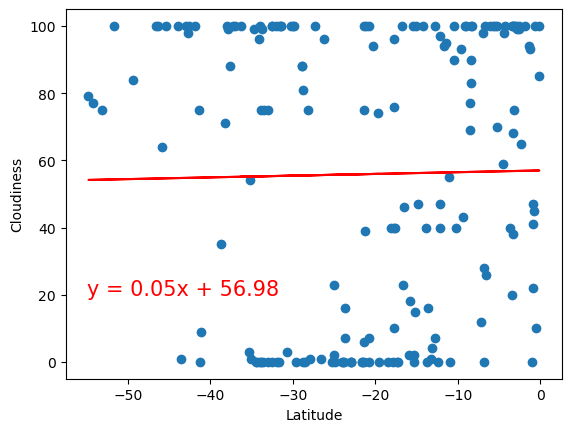

In [44]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Labeling plot and annotating the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (-55, 20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig11.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Based on the charts there is not much correlation between cloud coverage and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00210852479110784


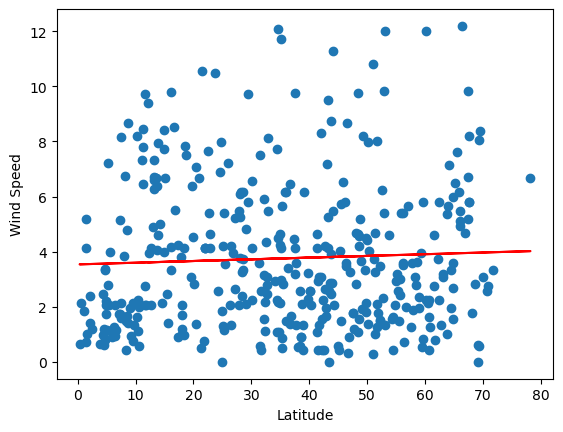

In [45]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Labeling plot and annotating the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (60, 30), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig12.png")

# Show plot
plt.show()

The r-value is: 0.02593630050291776


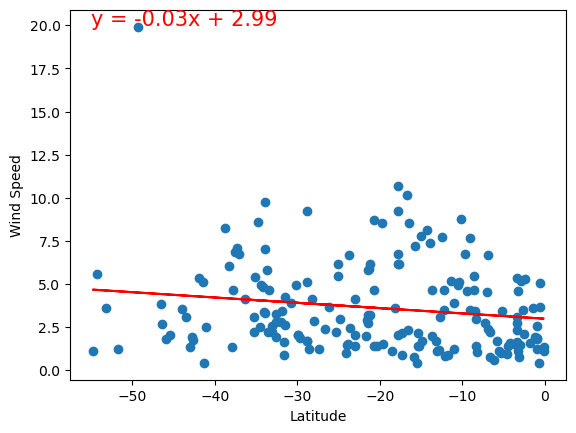

In [46]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Labeling plot and annotating the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (-55, 20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig(r"C:\Users\rockm\Desktop\School\homework\python-api-challenge 6\Starter_Code\output_data\Fig13png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Southern hemisphere has a greater correlation to wind speed. 